#자율과제(지난번 내주신)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving drinks(2).csv to drinks(2).csv


In [ ]:
import pandas as pd
file=open('drinks(2).csv')
drinks=pd.read_csv(file)

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


1. total_servings를 출력

In [ ]:
drinks['total_servings']=drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [ ]:
drinks['continent']=drinks['continent'].fillna('etc')
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
 6   total_servings                193 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.7+ KB


In [ ]:
total_mean=drinks.total_servings.mean()
total_mean
total_con_mean=drinks.groupby('continent').total_servings.mean()
spirit_con_mean=drinks.groupby('continent').spirit_servings.mean()
spirit_mean=drinks.spirit_servings.mean()


In [ ]:
con_mean=drinks.groupby('continent').mean() #대륙별 그룹화
con_mean

result=con_mean[con_mean['total_servings']< total_mean]
result.sort_values(by='spirit_servings', ascending=0).index[0]

'AS'

2. 전체 알코올 평균 섭취량보다 적은 알코올을 섭취하는 대륙

In [ ]:
low_drink_con=total_con_mean[total_con_mean<total_mean]

In [ ]:
low_drink_con

continent
AF     94.075472
AS    106.954545
OC    183.750000
Name: total_servings, dtype: float64

3.  2번 중에서 **‘spirit’을** 가장 많이 마시는 대륙 탐색

In [ ]:
low_drink=pd.DataFrame(low_drink_con) #평균보다 적게마시는 대륙 탐색
low_drink

,total_servings
continent,
AF,94.075472
AS,106.954545
OC,183.750000


In [ ]:
spirit_drink=pd.DataFrame(spirit_con_mean) #spirit를 마시는 대륙 탐색
spirit_drink=spirit_drink.sort_values(by='spirit_servings', ascending=0)
spirit_drink

,spirit_servings
continent,
etc,165.739130
EU,132.555556
SA,114.750000
AS,60.840909
OC,58.437500
AF,16.339623


In [ ]:
result=pd.concat([low_drink,spirit_drink], axis=1) # 위의 두개의 데이터 프레임을 열까리 합성.
result.dropna(axis=0).sort_values(by='spirit_servings', ascending=0) #결측치가 있는 행을 삭제함. 

,total_servings,spirit_servings
AS,106.954545,60.840909
OC,183.750000,58.437500
AF,94.075472,16.339623


4. 데이터의 시각화

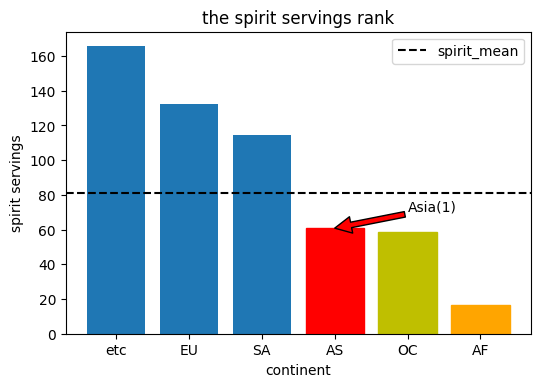

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

spirit_con=spirit_drink.index.tolist()
x=np.arange(len(spirit_con))
y=spirit_drink.spirit_servings.tolist()

plt.figure(dpi=100)
bar_list = plt.bar(x, y)
bar_list[spirit_con.index("AS")].set_color('r')
bar_list[spirit_con.index("AF")].set_color('orange')
bar_list[spirit_con.index("OC")].set_color('y')

plt.ylabel('spirit servings')
plt.xlabel('continent')
plt.xticks(x, spirit_con)
plt.title('the spirit servings rank')
AS_rank = spirit_con.index("AS") 
AS_val=spirit_drink.loc[(spirit_drink.index=='AS')]['spirit_servings'][0]

plt.annotate('Asia(1)', 
 xy=(AS_rank, AS_val), 
 xytext=(AS_rank + 1, AS_val + 10),
 arrowprops=dict(facecolor='red'))
plt.axhline(spirit_mean, min(x), max(x), linestyle='--', color='k', label='spirit_mean')
plt.legend()
plt.show()


#판다스 문법

#데이터 프레임

In [ ]:
import pandas as pd

In [ ]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
custom = [1, 5, 25, 13, 23232]

In [ ]:
#'name'과 'birth'로 구성된 데이터프레임 생성
#'zip' 함수로 'list' 자료형 구성
#'pd.DataFrame'으로 데이터프레임 생성
BabyDataSet = list(zip(names,births)) #zip으로 2개 리스트를 자료형으로 구성함. 
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births']) #column 이름을 지정하지 않으면 0, 1 로 정해진다. 


In [ ]:
#데이터프레임 상단(default=5개) 부분 출력
#()안 숫자로 원하는 데이터 개수 출력
df.head(2) #행의 갯수는 지정가능하다. 

,Names,Births,custom
0,Bob,968,1
1,Jessica,155,5


In [ ]:
#'custom'열 추가
df['custom'] = custom
df

,Names,Births,custom
0,Bob,968,1
1,Jessica,155,5
2,Mary,77,25
3,John,578,13
4,Mel,973,23232


In [ ]:
# 데이터프레임의 열 타입 정보를 출력
print(df.dtypes)

Names     object
Births     int64
custom     int64
dtype: object


In [ ]:
# 데이터프레임의 형태 정보
print(df.index)


RangeIndex(start=0, stop=5, step=1)


In [ ]:
# 데이터프레임의 열 정보
print(df.columns)

Index(['Names', 'Births', 'custom'], dtype='object')


In [ ]:
# 데이터프레임의 하나의 열을 선택
df['Names']


0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [ ]:
# 0~3 번째 인덱스를 선택
df[0:3]

,Names,Births,custom
0,Bob,968,1
1,Jessica,155,5
2,Mary,77,25


In [ ]:
df.head(3) #head를 이용하여 출력가능

,Names,Births,custom
0,Bob,968,1
1,Jessica,155,5
2,Mary,77,25


In [ ]:
# Births 열이 100보다 큰 데이터를 선택
df[df['Births'] > 100]

,Names,Births,custom
0,Bob,968,1
1,Jessica,155,5
3,John,578,13
4,Mel,973,23232


In [ ]:
 #데이터프레임에서의 평균값을 계산
df.mean() #평균값

Births     550.2
custom    4655.2
dtype: float64

In [ ]:
df.std() #표준편차

Births      428.424672
custom    10384.750945
dtype: float64

#Numpy

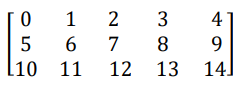

In [ ]:
import numpy as np

In [ ]:
arr = np.arange(15).reshape(3, 5)
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [ ]:
#데이터 차원 확인
arr.shape

(3, 5)

In [ ]:
#데이터 타입 확인, 구글 코랩은 64bit, 컴퓨터마다 bit차이 있음. 
arr.dtype

dtype('int64')

In [ ]:
#'0'으로 구성된 3x5 행렬 생성
arr0 = np.zeros((3,5))
print(arr0)

In [ ]:
#'0'으로 구성된 3x5 행렬 생성
arr0 = np.zeros((3,5))
print(arr0)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
#'1'으로 구성된 3x4 행렬 생성
arr1 = np.ones((3,4))
print(arr1)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:
#간단한 배열 사칙연산
arr_1 = np.array([[1,2,3],[4,5,6]])
arr_2 = np.array([[7,8,9],[10,11,12]])
print("arr_1 + arr_2 = ")
print(arr_1 + arr_2,"\n") # \n은 줄바뀜역할
print("arr_1 - arr_2 = ")
print(arr_1 - arr_2,"\n")
print("arr_1 * arr_2 = ")
print(arr_1 * arr_2,"\n")
print("arr_1 / arr_2 = ")
print(arr_1 / arr_2,"\n")


arr_1 + arr_2 = 
[[ 8 10 12]
 [14 16 18]] 

arr_1 - arr_2 = 
[[-6 -6 -6]
 [-6 -6 -6]] 

arr_1 * arr_2 = 
[[ 7 16 27]
 [40 55 72]] 

arr_1 / arr_2 = 
[[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]] 



#Matplotlib

In [ ]:
#’matplotlib’ 라이브러리의 ‘pyplot’ 모듈을 ‘plt’ 약자로 사용
import matplotlib.pyplot as plt
%matplotlib inline 
#현재 실행중인 환경에서 그래프 출력


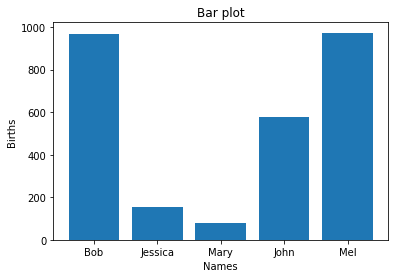

In [ ]:
y= df['Births']
x = df['Names']
# bar plot을 출력
plt.bar(x, y) #막대그래프 객체 생성
plt.xlabel('Names') #x축 제목
plt.ylabel('Births') #y축 제목
plt.title('Bar plot') #그래프 제목
plt.show() #그래프 출력

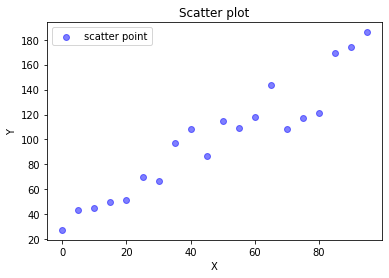

In [ ]:
# 랜덤 추출 시드를 고정
np.random.seed(0)
# scatter plot 데이터를 생성
x = np.arange(0.0, 100.0, 5.0)
y = (x * 1.5) + np.random.rand(20) * 50
# scatter plot을 출력
plt.scatter(x, y, c="b", alpha=0.5, label="scatter point") #파란색, 투명도0.5, 라벨표시
plt.xlabel("X") #x축라벨
plt.ylabel("Y") #y축라벨
plt.legend(loc='upper left') #좌상단에 범례
plt.title('Scatter plot') #제목표시
plt.show()

In [ ]:
print(x)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.
 90. 95.]


In [ ]:
 a=np.random.rand(20)

In [ ]:
a.shape

(20,)

In [ ]:
print(y)

[ 27.4406752   43.25946832  45.1381688   49.74415915  51.18273997
  69.79470565  66.87936056  97.08865004 108.18313803  86.67207594
 114.5862519  108.94474599 118.40222805 143.77983191 108.55180291
 116.85646499 121.01091987 169.13099228 173.90783755 186.00060741]


#AXIS(가로 세로)

In [ ]:
df = pd.DataFrame(
 {'name': ['KIM', 'LEE', 'SMITH','BROWN', 'MILLER'],
 'age': [24, 32, 43, 24, np.nan],   
 'height': [178, 168, 171, 185, 176],
 'sex': ['M', 'F', 'F', 'M', 'F']})
df

,name,age,height,sex
0,KIM,24.0,178,M
1,LEE,32.0,168,F
2,SMITH,43.0,171,F
3,BROWN,24.0,185,M
4,MILLER,NaN,176,F


In [ ]:
df[['age', 'height']].mean(axis=0)


age        30.75
height    175.60
dtype: float64

In [ ]:
df[['age', 'height']].mean(axis=1)


0    101.0
1    100.0
2    107.0
3    104.5
4    176.0
dtype: float64

In [ ]:
df[['age', 'height']].rank(axis=0)

,age,height
0,1.5,4.0
1,3.0,1.0
2,4.0,2.0
3,1.5,5.0
4,NaN,3.0


In [ ]:
df[['age', 'height']].rank(axis=1)

,age,height
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,1.0,2.0
4,NaN,1.0


#결측치

In [ ]:
# 우선 결측치가 포함된 데이터프레임 생성
import pandas as pd
import numpy as np

In [ ]:
#pandas에서는 'None'도 'NaN'으로 반환
dict = {'A': [110, 90, np.nan, 95], 'B': [30, 45, 56, np.nan], 'C': [np.nan, 40, 80, 98]}

In [ ]:
df = pd.DataFrame(dict)
df

,A,B,C
0,110.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [ ]:
#()안의 특정 단일값으로 채우기. '문자열'도 가능
df_0 = df.fillna(0)
df_0

,A,B,C
0,110.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [ ]:
#결측치 이전 셀값으로 채우기
df_a = df.fillna(method='ffill') # pad도 가능, bfill과의 일관성을 위해
df_a


,A,B,C
0,110.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


In [ ]:
#결측치 이후 셀값으로 채우기
df_b = df.fillna(method='bfill')
df_b

,A,B,C
0,110.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


In [ ]:
#(결측치, 원하는 값)으로 바꾸어 준다. 
df_R = df.replace(np.nan, 'R')
df_R


,A,B,C
0,110,30,R
1,90,45,40
2,R,56,80
3,95,R,98


In [ ]:
#선형방정식-forward
df_inter_L = df.interpolate(method='linear', limit_direction='forward')
df_inter_L

,A,B,C
0,110.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,56.0,80.0
3,95.0,56.0,98.0


In [ ]:
#선형방정식-backward
df_inter_L = df.interpolate(method='linear', limit_direction='backward')
df_inter_L


,A,B,C
0,110.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,56.0,80.0
3,95.0,NaN,98.0


In [ ]:
#(3-2) 다차다항식
df_inter_P = df.interpolate(method='polynomial', order=2)
df_inter_P

,A,B,C
0,110.0,30.0,NaN
1,90.0,45.0,40.0
2,85.0,56.0,80.0
3,95.0,NaN,98.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving chipotle.tsv to chipotle.tsv


In [ ]:
import io
chipo = pd.read_csv(io.BytesIO(uploaded['chipotle.tsv']), sep='\t')# csv이면 sep이 없어도 된다. tsv는 반드시 있어야 한다. 
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
print(chipo.shape,'\n')
print('===============================================', '\n')
print(chipo.info()) #데이터 타입과 결측치를 확인가능하다. 

(4622, 5) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
print(chipo.describe()) #기본 수치 통계 계산

          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000


In [ ]:
chipo['order_id']=chipo['order_id'].astype(str)#order id는 의미없는 수치형이라서  문자형으로 바꾸고 통계에서 제외
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [ ]:
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [ ]:
print(chipo.shape,'\n')
print('===============================================', '\n')
print(chipo.info()) #데이터 타입과 결측치를 확인가능하다. 

(4622, 5) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


##질문 가장 많이 주문한 메뉴는 ?

In [ ]:
print(chipo['item_name'].unique()) #중복제외하고 갯수 파악 용이
print('==========================')
print('주문메뉴 종류=', len(chipo['item_name'].unique()), '개')

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

In [ ]:
item_count=chipo['item_name'].value_counts()[:10] # 위에서 조사한 상위 10개만 출력
item_count.head(10)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [ ]:
#enumerate는 순서와 값을 차례대로 제공한다. 
#iteritems는 키와 값을 순서대로 제공한다.
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1): #index를 1부터 부여, 없으면 0부터 시작함. 
    print('Top', idx, '메뉴: ',val, cnt, '개' )

Top 1 메뉴:  Chicken Bowl 726 개
Top 2 메뉴:  Chicken Burrito 553 개
Top 3 메뉴:  Chips and Guacamole 479 개
Top 4 메뉴:  Steak Burrito 368 개
Top 5 메뉴:  Canned Soft Drink 301 개
Top 6 메뉴:  Chips 211 개
Top 7 메뉴:  Steak Bowl 211 개
Top 8 메뉴:  Bottled Water 162 개
Top 9 메뉴:  Chicken Soft Tacos 115 개
Top 10 메뉴:  Chicken Salad Bowl 110 개


In [ ]:
#for 반복문
t = [1,5,7,9,11,13]
for p in t:
     print(p)
 
print(type(p))

1
5
7
9
11
13
<class 'int'>


In [ ]:
t = [1,5,7,9,11,13]
for p in enumerate(t): #튜플형태로 출력, 인데스 부여
 print(p)
print(type(p))

(0, 1)
(1, 5)
(2, 7)
(3, 9)
(4, 11)
(5, 13)
<class 'tuple'>


##메뉴 별 주문 개수와 주문 총량은?


In [ ]:
#메뉴 별 주문 개수 출력
#groupby().count()
item_count = chipo.groupby('item_name')['quantity'].count()
item_count[:10] # 알파벳 순으로 10개 출력


item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: quantity, dtype: int64

In [ ]:
# 메뉴 별 주문 총량 출력
#groupby().sum()
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] 

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [ ]:
#위 두 결과를 agg로 한 번에 출력
Item_order_quantity=chipo.groupby('item_name').agg({'quantity':['count', 'sum']})
Item_order_quantity[:10]

quantity     
                         count  sum
item_name                          
6 Pack Soft Drink           54   55
Barbacoa Bowl               66   66
Barbacoa Burrito            91   91
Barbacoa Crispy Tacos       11   12
Barbacoa Salad Bowl         10   10
Barbacoa Soft Tacos         25   25
Bottled Water              162  211
Bowl                         2    4
Burrito                      6    6
Canned Soda                104  126

#시각화 분석 결과(그래프 그리기)

In [ ]:
# x-축에는 주문 항목에 해당하는 ‘item_quantity’의 index만 list 형태로 출력
item_quantity.index.tolist()

['6 Pack Soft Drink',
 'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bottled Water',
 'Bowl',
 'Burrito',
 'Canned Soda',
 'Canned Soft Drink',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Chips',
 'Chips and Fresh Tomato Salsa',
 'Chips and Guacamole',
 'Chips and Mild Fresh Tomato Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Crispy Tacos',
 'Izze',
 'Nantucket Nectar',
 'Salad',
 'Side of Chips',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Ta

In [ ]:
# y-축에는 총 주문량에 해당하는 ‘item_quantity’의 value만 list 형태로 출력
item_quantity.values.tolist()


[55,
 66,
 91,
 12,
 10,
 25,
 211,
 4,
 6,
 126,
 351,
 71,
 60,
 8,
 1,
 6,
 40,
 761,
 591,
 50,
 9,
 123,
 120,
 230,
 130,
 506,
 1,
 23,
 18,
 45,
 50,
 33,
 25,
 2,
 20,
 29,
 2,
 110,
 221,
 386,
 36,
 4,
 31,
 56,
 87,
 97,
 1,
 6,
 18,
 8]

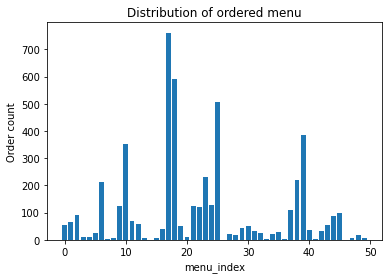

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#그래프 x, y축 전처리 작업
item_name_list = item_quantity.index.tolist() #x축 전처리 작업:item_quantity의인덱스 부분만 리스트 형태로 변환
x = np.arange(len(item_name_list)) #x축 길이를 계산하여 범위화 np.arrange(start, stop, step)
y= item_quantity.values.tolist() #y축 전처리 작업:item_quantity의 value 부분만 리스트 형태로 변환

#그래프 시각화
plt.bar(x, y)
plt.ylabel('Order count')
plt.xlabel('menu_index')
plt.title('Distribution of ordered menu')
plt.show()


In [ ]:
print(chipo['item_name'].value_counts()[:10])
print(type(chipo['item_name'].value_counts()))

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
print(chipo['item_name'].unique()[:10]) #중복되지 않는 10개 추출
print(type(chipo['item_name'].unique()))

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']
<class 'numpy.ndarray'>


#전처리

In [ ]:
# ’item_price’ 데이터 확인
print(chipo.info())
chipo['item_price'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

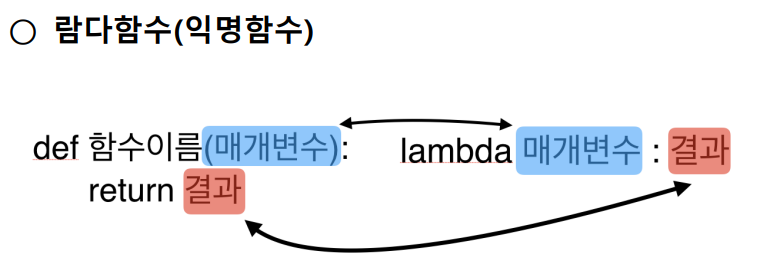

In [ ]:
# ’$’를 제거한 후 숫자형 데이터로 저장
# ‘apply()’ 함수를 이용하여 전처리
# 익명함수 ‘lmbda’를 이용하여 ‘$’ 제거
# 매개변수(x)를 입력 받아 결과(float(x[1:]))를 반환
# ‘$2.39’에서 0번째 자리인 ‘$’를 제외하고 1번째 자리인 ‘2’ 이후부터 반환
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print(chipo.info())
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB
None


0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [ ]:
#람다 함수의 활용 예시
(lambda x: x+1)(3)


4

In [ ]:
add = lambda x: x+1
add(4)

5

In [ ]:
add(5)

6

In [ ]:
# 데이터 확인
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [ ]:
# 통계치 확인
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [ ]:
# ‘order_id’로 그룹화 한 후, 그룹 별 ‘item_price’를 더한 후, 더한 값들의 평균
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [ ]:
# ‘order_id’로 그룹화 한 후, 그룹 별 ‘item_price’를 더한 후, 더한 값들의 평균
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [ ]:
# 주문 테이블 당 총 주문액 구하고,
# 총 주문액이 100달러 이상인 주문 테이블 필터링한 후, 결과 출력
id_group_sum = chipo.groupby('order_id').sum()
more_10_id = id_group_sum[id_group_sum['item_price'] >= 100] #판다스에서는 이게 더 좋은 표현일수도
#more_10_id=id_group_sum['item_price'] >= 100 #진리표만 나옴
more_10_id


,quantity,item_price
order_id,,
1443,35,160.74
1483,14,139.00
1786,20,114.30
205,12,109.90
491,10,102.00
511,17,104.59
691,11,118.25
926,23,205.25


In [ ]:
# 주문 테이블 당 총 주문액 구하고,
# 총 주문액이 100달러 이상인 주문 테이블 필터링한 후, 결과 출력
id_group_sum = chipo.groupby('order_id').sum()
more_10_id = id_group_sum[id_group_sum.item_price >= 100]
more_10_id

,quantity,item_price
order_id,,
1443,35,160.74
1483,14,139.00
1786,20,114.30
205,12,109.90
491,10,102.00
511,17,104.59
691,11,118.25
926,23,205.25


In [ ]:
# 우선 수량(‘quantity’)이 한 개인 메뉴만 필터링한 후,
# ‘item_name’으로 그룹화 하여 그룹 별 최소값 탐색하고,
# 탐색된 값을 오름차순 혹은 내림차순으로 정리
# series 데이터를 정렬하는 ‘sort_values(by = “”) 함수 사용
# 오름 혹은 내림차순은 ascending = True 혹은 False로 정렬
chipo_one_item = chipo[chipo.quantity == 1]
min_per_item = chipo_one_item.groupby('item_name').min()# 최솟값구하기
min_per_item.sort_values(by = "item_price", ascending = True)

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,1009,1,NaN,1.09
Canned Soda,100,1,[Coca Cola],1.09
Canned Soft Drink,1003,1,[Coke],1.25
Side of Chips,1002,1,NaN,1.69
Chips,1005,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,1215,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,1156,1,NaN,2.39


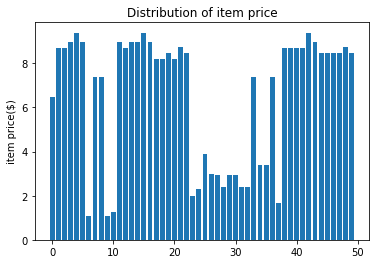

In [ ]:
# 메뉴 별 가격 분포 그래프 그리기
# x-축 설정: 위에서 구한 'min_per_item'을 이용하여 x-축 범위 설정
# y-축 설정: min_per_item'의 'item_price'로 설정
item_name_list = min_per_item.index.tolist() #리스트로 변경
x = np.arange(len(item_name_list))
y = min_per_item['item_price'].tolist()
plt.bar(x, y, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()


In [ ]:
# 테이블 별로 그룹화 한 후,
# 그룹 별 합계 연산 적용 후,
# ‘item_price’를 ‘sort_values()’ 함수를 이용하여 비싼 순으로 정렬
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)


,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
1014,2,10.08
730,2,10.08
14,2,10.08


In [ ]:
chipo.groupby('order_id').sum().max().head()

quantity       35.00
item_price    205.25
dtype: float64

In [ ]:
chipo.groupby('order_id').sum().head()

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08


In [ ]:
Veggie_Salad_Bowl = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
print(len(Veggie_Salad_Bowl), '번 주문 되었습니다.')
Veggie_Salad_Bowl.sort_values(by='item_price', ascending=True)

18 번 주문 되었습니다.


,order_id,quantity,item_name,choice_description,item_price
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
3293,1321,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2683,1066,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
4541,1805,1,Veggie Salad Bowl,"[Tomatillo Green Chili Salsa, [Fajita Vegetabl...",8.75
4573,1818,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25


In [ ]:
# 우선 ‘item_name’이 “Chicken Bowl”인 데이터만 필터링
# ‘quantity’가 2 이상인 데이터만 추가 필터링 후, 그 데이터 수를 출력
Chicken_Bowl= chipo[chipo['item_name'] == "Chicken Bowl"]
two_more_Chicken_Bowl = Chicken_Bowl[Chicken_Bowl['quantity'] >= 2]
len(two_more_Chicken_Bowl)

33

In [ ]:
print(two_more_Chicken_Bowl.sum()['quantity'], '개')

68 개


In [ ]:
print("$",two_more_Chicken_Bowl.sum()['item_price'])


$ 642.71


#Drink

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving drinks.csv to drinks.csv


In [ ]:
import io
import pandas as pd
drinks=pd.read_csv(io.BytesIO(uploaded['drinks.csv']))
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
import pandas as pd
file=open('drinks.csv')
drinks=pd.read_csv(file)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
drinks.info() #자료정보 확인, 이를 통해 대륙의 결측치를 확인함. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [ ]:
drinks.describe()#통계 정보 확인

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
corr=drinks[['beer_servings','wine_servings', 'spirit_servings', 'total_litres_of_pure_alcohol']].corr(method='pearson')
corr

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.527172,0.458819,0.835839
wine_servings,0.527172,1.000000,0.194797,0.667598
spirit_servings,0.458819,0.194797,1.000000,0.654968
total_litres_of_pure_alcohol,0.835839,0.667598,0.654968,1.000000


(피어슨의) 
상관계수는 일반적으로,
값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계

값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계

값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계

값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계

값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계

값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계

값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계


In [ ]:
import seaborn as sns


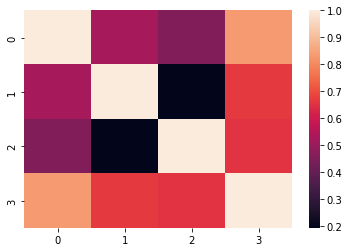

In [ ]:
sns.heatmap(corr.values)


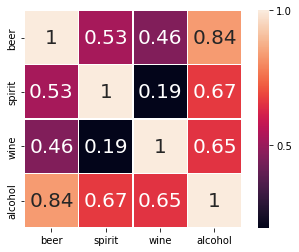

In [ ]:
#우선 변수명을 축약
# cbar: Color_bar
# annot: annotate(주석)
# square: 정사각형, 'False'면 약간 직사각형 형태
#linewidths: 경계선 설정
# sns.set(font_scale = 1.5): 글자 크기 조정
cols_name = ['beer', 'spirit', 'wine', 'alcohol']
sns.heatmap(corr.values, cbar=True, annot=True, annot_kws={'size':20}, square=True, linewidths=0.2, xticklabels=cols_name, yticklabels=cols_name)
sns.set(font_scale = 3) #축의 글자 사이즈


<Figure size 432x288 with 0 Axes>

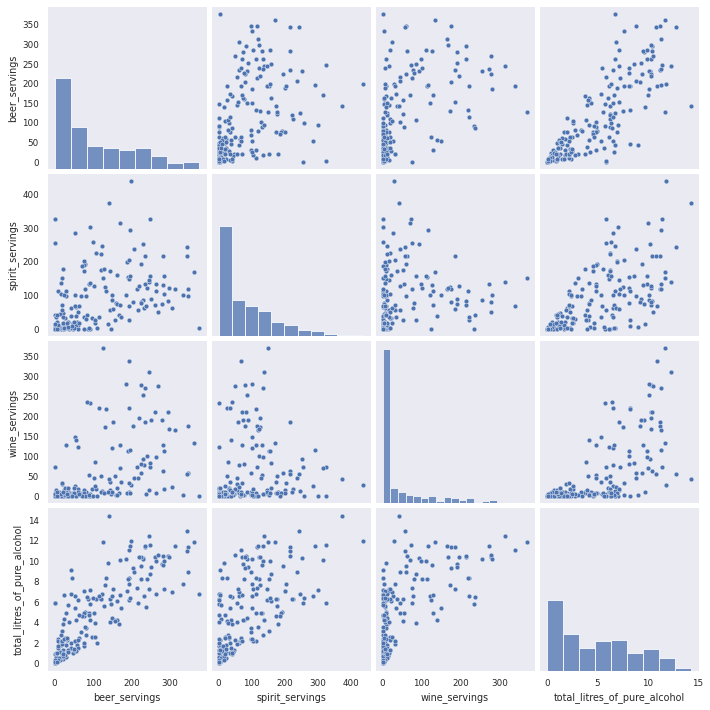

In [ ]:
# 'context': 4종류 사이즈 설정(paper, notebook, talk, poster)
#style= darkgrid, whitegrid, dark, white, ticks
# 보다 디테일한 세팅: seaborn.set(context, style, palette, font, font_scale,color_code, rc)
sns.set(style='dark', context='paper',font_scale = 1)
sns.despine(left=True, bottom=True)
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']])

#데이터 전처리

In [ ]:
drinks['continent'] = drinks['continent'].fillna('etc') #결측치를 etc로 변환
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,etc
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


['AF', 'EU', 'AS', 'etc', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


<function matplotlib.pyplot.show>

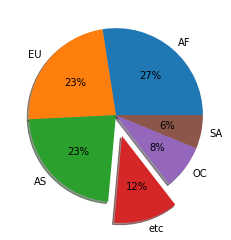

In [ ]:
import matplotlib.pyplot as plt

index = drinks['continent'].value_counts().index.tolist()
value = drinks['continent'].value_counts().values.tolist()
# 어느 파이 조각을 뺄 것인가?`
# 분포가 높은 순으로 정리되기 때문에 'index' 출력 후 'explode'를 결정
print(index)
print(value)
explode = (0, 0, 0, 0.25, 0, 0) #조각의 크기 조절
plt.pie(value, labels=index, explode=explode, autopct='%.0f%%', shadow=True) #autopct퍼센트계산 및 소수점표현
plt.show


# 대륙별 'spirit_servings' 데이터 통계치 구하기

In [ ]:
con_drinks = drinks.groupby('continent')
con_drinks['spirit_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.339623,28.102794,0.0,1.00,3.0,19.00,152.0
AS,44.0,60.840909,84.362160,0.0,1.00,16.0,98.00,326.0
EU,45.0,132.555556,77.589115,0.0,81.00,122.0,173.00,373.0
OC,16.0,58.437500,70.504817,0.0,18.00,37.0,65.25,254.0
SA,12.0,114.750000,77.077440,25.0,65.75,108.5,148.75,302.0
etc,23.0,165.739130,94.993884,68.0,101.00,137.0,190.50,438.0


In [ ]:
#agg() 함수 이용의 장점은 여러가지 함수를 동시에 볼수 있는 것이다.
#group객체.agg([함수1,함수2,함수3,…])
#group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})
drinks.groupby('continent').beer_servings.agg(['sum', 'mean', 'std', 'max', 'min'])

,sum,mean,std,max,min
continent,,,,,
AF,3258,61.471698,80.557816,376,0
AS,1630,37.045455,49.469725,247,0
EU,8720,193.777778,99.631569,361,0
OC,1435,89.687500,96.641412,306,0
SA,2101,175.083333,65.242845,333,93
etc,3345,145.434783,79.621163,285,1


In [ ]:
#구하고자 하는 결과대로 생각하고 구하자. 
total_mean = drinks.total_litres_of_pure_alcohol.mean() #전체평균
cont_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()#대륙별 평균
cont_mean[cont_mean >= total_mean] #평균보다 큰 대륙을 부등식으로 구함. 


continent
EU     8.617778
SA     6.308333
etc    5.995652
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
#구하고자 하는 결과대로 생각하고 구하자. 
total_mean = drinks.total_litres_of_pure_alcohol.mean() #전체평균
cont_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()#대륙별 평균
cont_mean >= total_mean #이랗게 하면 Bool값만 나옴


continent
AF     False
AS     False
EU      True
OC     False
SA      True
etc     True
Name: total_litres_of_pure_alcohol, dtype: bool

In [ ]:
#idxmax() 사용법(인덱스의 최댓값)
drinks.groupby('continent').beer_servings.mean().idxmax()


'EU'

In [ ]:
#참고: idmin()(인덱스의 최솟값)
drinks.groupby('continent').beer_servings.mean().idxmin()

'AS'

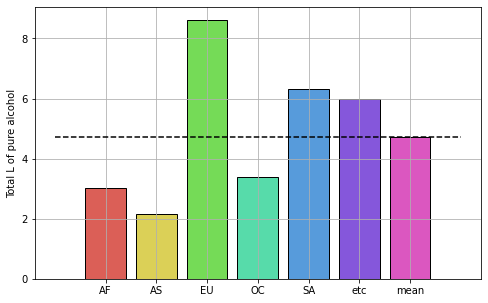

In [ ]:
import numpy as np
continents=cont_mean.index.tolist()
continents.append('mean') #대륙의 리스크에 mean 추가

x=np.arange(len(continents))
y=cont_mean.tolist()
y.append(total_mean)

plt.figure(figsize=(8,5))

#bar_graph=plt.bar(x,y,color='g') 
bar_graph=plt.bar(x,y,color=sns.color_palette('hls',len(continents)),edgecolor='black') #구글에서 sns color를 검색해서 알아봐야 한다. 
#bar_graph[len(continents)-1].set_color('r')

plt.plot([-1,7],[total_mean,total_mean], 'k--') #평균점선을 그리는 과정
plt.xticks(x, continents)
plt.ylabel('Total L of pure alcohol')

plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


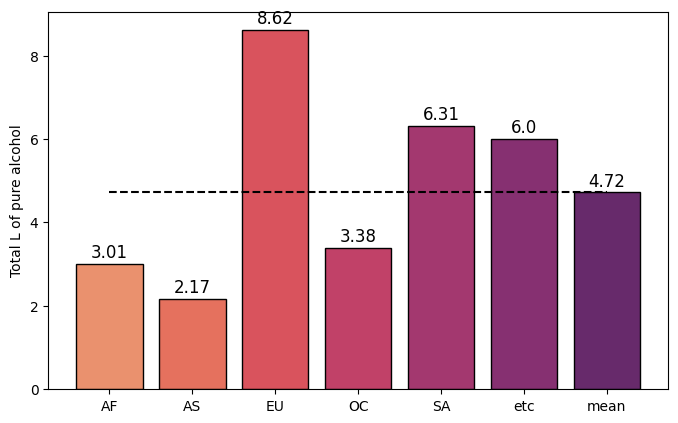

In [ ]:
continents = cont_mean.index.tolist()
continents.append('mean')
x = np.arange(len(continents))
y = cont_mean.tolist()
y.append(total_mean)
fig = plt.figure(figsize=(8,5),dpi=100)
bar_graph = plt.bar(x, y, color = sns.color_palette('flare',len(continents)),edgecolor='black') # 색상에는 hls,pastel, Set2, flare 등이 있음
plt.plot([0, 6], [total_mean, total_mean], "k--")
plt.xticks(x, continents)
plt.ylabel('Total L of pure alcohol')
#수치 추가하기
y = np.round(y,2) #소수 2째 자리까지 표기
ax = fig.add_subplot()
for i, b in enumerate(bar_graph):
 ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.15, y[i], ha='center',fontsize=12)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drinks.csv to drinks.csv


In [ ]:
file=open('drinks.csv')
drinks=pd.read_csv(file)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
# scipy 설치
!pip install scipy

In [ ]:
# scipy: 수학, 과학, 공학을 위한 오픈소스 SW
# stats: 통계 함수 모듈
from scipy import stats


In [ ]:
#해당 대륙 데이터만 추출하여 저장
Africa = drinks.loc[drinks['continent'] == 'AF']
Europe = drinks.loc[drinks['continent'] == 'EU']

In [ ]:
from scipy.stats import bartlett #ttest전에 실행해서 등분산을 검정해야 한다. 
bartlett(Africa['beer_servings'], Europe['beer_servings']) #pvalue=0.143으로 0.05보다 큰값을 가진다. 이를 통해 이분산을 임을 알고 equal_var=False로설정한다. 

BartlettResult(statistic=2.1393208136069135, pvalue=0.14356543988378348)

In [ ]:
#해당 대륙의 평균 맥주 소비량
print('아프리카 맥주 평균 소비량 = ', Africa['beer_servings'].mean())
print('유럽 맥주 평균 소비량 = ', Europe['beer_servings'].mean())
print('아프리카 맥주소비량 분산 = ', Africa['beer_servings'].std())
print('유럽 맥주소비량 분산 = ', Europe['beer_servings'].std())

#t-test 수행(stats.ttest_ind())
# equal_var: 등분산 여부
#True=등분산; False=이분산
t_test = stats.ttest_ind(Africa['beer_servings'], Europe['beer_servings'],equal_var=False)#pvalue가 0.05보다 커서 귀무가설을 채택하고 두 집단 간의 차이가 없다. 
print(t_test)


아프리카 맥주 평균 소비량 =  61.471698113207545
유럽 맥주 평균 소비량 =  193.77777777777777
아프리카 맥주소비량 분산 =  80.5578157822034
유럽 맥주소비량 분산 =  99.6315687668798
Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)


In [ ]:
drinks['total_servings']= drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']

In [ ]:
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol']/drinks['total_servings']

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495


In [ ]:
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)

In [ ]:
country_with_alcohol=drinks[['country','alcohol_rate']]

In [ ]:
country_with_alcohol=country_with_alcohol.sort_values(by='alcohol_rate', ascending=False) #ascending=0으로 표기해도 된다.
country_with_alcohol.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


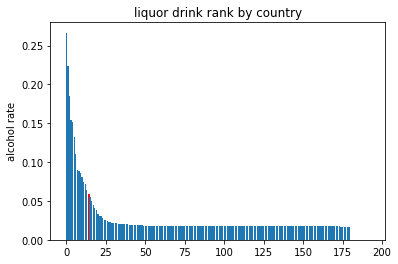

In [ ]:
#x-축 설정
country_list = country_with_alcohol.country.tolist()
x = np.arange(len(country_list))
#y-축 설정
rank = country_with_alcohol.alcohol_rate.tolist()
#bar 그래프 그리기
bar_list = plt.bar(x, rank)
#'South Korea' bar만 빨간색으로 설정
bar_list[country_list.index("South Korea")].set_color('r')
#y-축 제목
plt.ylabel('alcohol rate')
#그래프 제목
plt.title('liquor drink rank by country')
#축 범위 설정
#plt.axis([0, 200, 0, 0.3])
#x-축 좌표인 'South Korea'의 위치
korea_rank = country_list.index("South Korea") # 14

#y-축 좌표인 'South Korea'의 'alcohol_rate' 값
korea_alc_rate = country_with_alcohol[country_with_alcohol['country'] == 'SouthKorea']['alcohol_rate'] #0.059394
#그래프 내 화살표 주석 달기
#plt.annotate: 그래프에서 주석 추가
#xy: 화살표가 가르킬 위치
#xytext: 텍스트 위치
#fontsize=40: 글자 크기
#화살표 옵션
#arrowprops: 화살표 정의
#facecolor: 화살표 내부 색깔
#edgecolor: 화살표 외부선 색깔
#fill=True: 화살표 내부 색깔 채우기
#shrink=0.15: 화살표 시작점과 텍스트 간 거리 설정(0~1). 아래는 텍스트 위치가 이미 지정
#headwidth=80: 화살 머리 너비
#headlength=100: 화살 머리 길이
#width=30: 화살대 너비
#plt.annotate('South Korea : ' + str(korea_rank + 1),xy=(korea_rank, korea_alc_rate),xytext=(korea_rank + 10, korea_alc_rate + 0.05),arrowprops=dict(facecolor='red'))
plt.show()

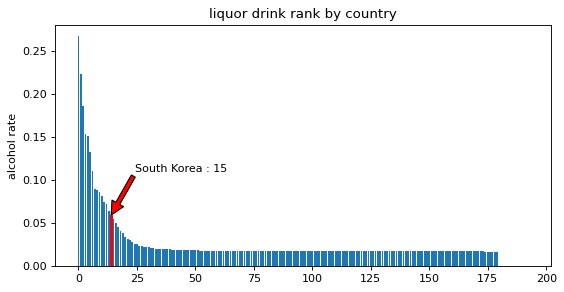

In [ ]:
#x-축 설정
country_list = country_with_alcohol.country.tolist()
x = np.arange(len(country_list))
#y-축 설정
rank = country_with_alcohol.alcohol_rate.tolist()

#bar 그래프 그리기
plt.figure(figsize=(8,4), dpi=80, edgecolor='b')
bar_list = plt.bar(x, rank)
bar_list[country_list.index("South Korea")].set_color('r')
#y-축 제목
plt.ylabel('alcohol rate')
#그래프 제목
plt.title('liquor drink rank by country')

korea_alc_rate = country_with_alcohol[country_with_alcohol['country'] == 'South Korea']['alcohol_rate'] 

plt.annotate('South Korea : '+ str(korea_rank+1) ,xy=(korea_rank, korea_alc_rate),xytext=(korea_rank + 10, korea_alc_rate + 0.05),arrowprops=dict(facecolor='red'))
plt.show()

#Picher

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#해당 파일은 적당한 폴더에 저장
from google.colab import files
uploaded = files.upload()


Saving pitcher_stats_2017.csv to pitcher_stats_2017.csv


In [ ]:
file=open('pitcher_stats_2017.csv')
pitcher=pd.read_csv(file)
pitcher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [ ]:
#설치된 폰트 확인
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Humor Sans',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'cmb10',
 'cmex10',
 'cmmi10',
 'cmr10',
 'cmss10',
 'cmsy10',
 'cmtt10'}

In [ ]:
#폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
#한글 폰트 사용
mpl.rc('font', family='NanumGothic')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


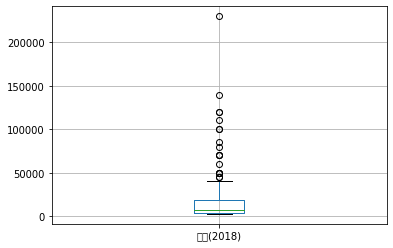

In [ ]:
#Box-Plot 그래프
pitcher.boxplot(column=['연봉(2018)'])

In [ ]:
#통계치
pitcher['연봉(2018)'].describe()


count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33624e6c10>]],
      dtype=object)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


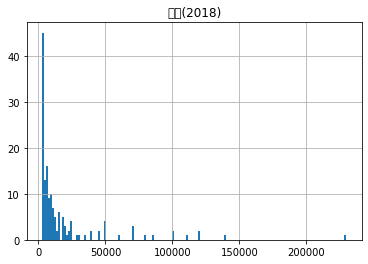

In [ ]:
#히스토그램
#bins: 가로축 구간 개수 지정 → 값 변경하며 확인
pitcher.hist(column=['연봉(2018)'], bins=152) 

In [ ]:
pitcher_features_df = pitcher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연
봉(2018)', '연봉(2017)']]

In [ ]:
def plot_hist_each_column(df):
 plt.rcParams['figure.figsize'] = [20, 16]
 fig = plt.figure(1)
 # df의 column 개수 만큼의 subplot 출력
 for i in range(len(df.columns)):
     ax = fig.add_subplot(5, 4, i+1)
     plt.hist(df[df.columns[i]], bins=50)
     ax.set_title(df.columns[i])
 plt.show()

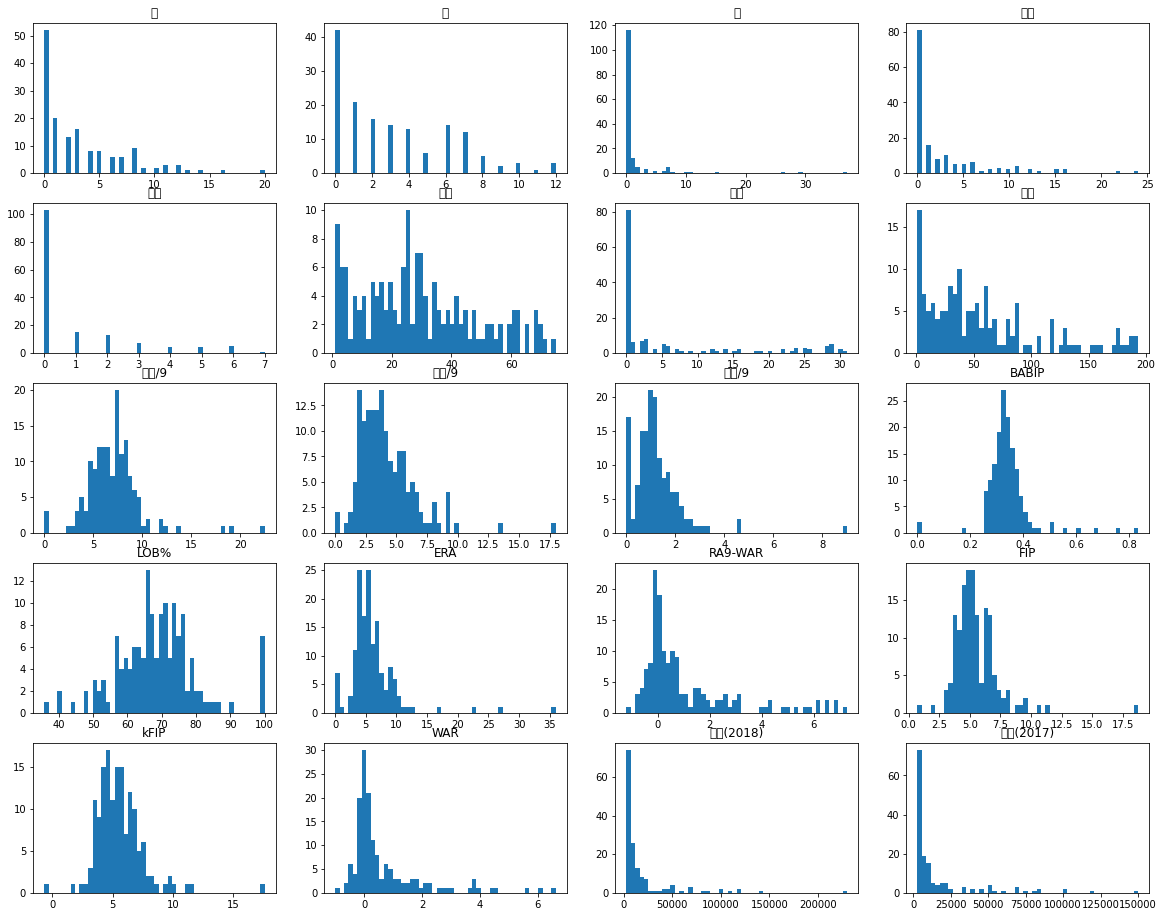

In [ ]:
plot_hist_each_column(pitcher_features_df)

In [ ]:
#pandas 형태로 정의된 데이터를 출력할 때,
#scientific-notation이 아닌 float 모양으로 출력
pd.options.mode.chained_assignment = None

In [ ]:
#각 항목에 대한 표준화 함수
def standard_scaling(df, scale_columns):
 for col in scale_columns:
     series_mean = df[col].mean()
     series_std = df[col].std()
     df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
 return df

In [ ]:
#피처 각각에 대한 표준화 수행
#예측 대상인 ‘연봉(2018)’ 항목은 표준화 필요 없음
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9','볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
pitcher_df = standard_scaling(pitcher, scale_columns)

In [ ]:
#표준화 결과 출력
pitcher_df = pitcher_df.rename(columns={'연봉(2018)': 'y'})
pitcher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [ ]:
#’팀명’ 항목을 one-hot encoding으로 변환
#테이블에 있는 ‘팀명’ 순서대로 '1' 할당
team_encoding = pd.get_dummies(pitcher_df['팀명'])

#원래 Dataframe에서 '팀명' 열 삭제
#drop(variables, axis=value)
pitcher_df = pitcher_df.drop('팀명', axis=1)

# '팀명' 열을 삭제한 Dataframe에 one-hot 추가
pitcher_df = pitcher_df.join(team_encoding)

#새로 생성된 Dataframe 샘플 출력
pitcher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705,0,0,0,0,0,0,1,0,0
